<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/029__Data_Aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 4/6: DATA CLEANING AND ANALYSIS

# MISSION 1: Data Aggregation

Learn how to aggregate data with pandas.

## 1. Introduction

So far, we've learned how to use the pandas library and how to create visualizations with data sets that didn't require much cleanup. However, most data sets in real life require extensive cleaning and manipulation to extract any meaningful insights. In fact, [Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#71dc8e8a6f63) estimates that data scientists spend about 60% of their time cleaning and organizing data, so it's critical to be able to manipulate data quickly and efficiently.

In this course, we'll learn the following:

- Data aggregation
- How to combine data
- How to transform data
- How to clean strings with pandas
- How to handle missing and duplicate data

You'll need some basic knowledge of pandas and matplotlib to complete this course, including:

- Basic knowledge of **pandas dataframes and series**
- How to **select values** and **filter a dataframe**
- Knowledge of **data exploration methods** in pandas, such as the `info` and `head` methods
- How to **create visualizations** in pandas and matplotlib

All of these prerequisites are taught in our Pandas and NumPy Fundamentals, Exploratory Data Visualization, and Storytelling Through Data Visualization courses. If you haven't completed those courses and aren't comfortable with the concepts above, we suggest completing them before continuing here.

In this course, we'll work with the **World Happiness Report**, an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.

It also includes estimates of factors that may contribute to each country's happiness, including economic production, social support, life expectancy, freedom, absence of corruption, and generosity, to provide context for the score. Although these factors aren't actually used in the calculation of the happiness score, they can help illustrate why a country received a certain score.

Throughout this course, we'll work to answer the following questions:

- **How can aggregating the data give us more insight into happiness scores?**
- **How did world happiness change from 2015 to 2017?**
- **Which factors contribute the most to the happiness score?**

In this mission, we'll start by learning **how to aggregate data**. Then in the following missions, we'll learn different data cleaning skills that can help us **aggregate and analyze the data in different ways**. We'll start by learning each topic in isolation, but build towards a more **complete data cleaning workflow by the end of the course**.



##2. Introduction to the Data

Let's start by looking at the World Happiness Report for 2015. The data set is a CSV file called `World_Happiness_2015.csv`. You can find the data [here](https://www.kaggle.com/unsdsn/world-happiness).

Let's load the data set below:


In [2]:
# Import functions from Google modules into Colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Insert file id from Google Drive shareable link:
# https://drive.google.com/file/d/1iZ8_lHkMx7pI22s4ECfpNHKnOohyPfvU/view?usp=sharing
id = "1iZ8_lHkMx7pI22s4ECfpNHKnOohyPfvU"

In [4]:
# Download the dataset
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('World_Happiness_2015.csv')

In [5]:
# Import pandas library
import pandas as pd
import numpy as np

In [6]:
 # Read the csv file
 happiness2015 = pd.read_csv("World_Happiness_2015.csv")

### **Exploring the data**
Let's render the first few and last few values of this pandas object, by running the `happiness2015` variable in a separate cell.

In [7]:
# Render the first 5 rows of the autos dataframe
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Below are descriptions for some of the columns we'll be working with:

- `Country` - Name of the country.
- `Region` - Name of the region the country belongs to.
- `Happiness Rank` - The rank of the country, as determined by its happiness score.
- `Happiness Score` - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- `Family` - The estimated extent to which family contributes to the happiness score.
- `Freedom` - The estimated extent to which freedom contributes to the happiness score.
- `Generosity` - The estimated extent to which generosity contributes to the happiness score.

To start, let's read our data set into a pandas dataframe and inspect it.



**Instructions:**

- Store the first five rows of the dataframe in a variable called `first_5`.
- Use the `DataFrame.info()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) to print information about the dataframe.
- After you have run your code, use the variable inspector to look at the variable `first_5` and the output to get familiar with the data.

In [8]:
first_5 = happiness2015.head()

In [9]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

##3. Using Loops to Aggregate Data

First, let's visualize the happiness score of each country in `happiness2015`:

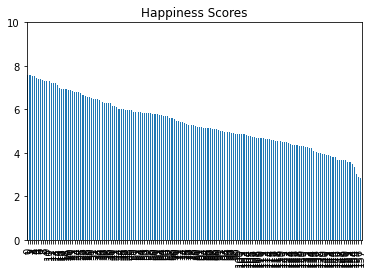

In [10]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))

Plotting the data in its current form isn't helpful at all! There are so many data points that we can't see any of the values or labels.

You may have noticed that each country in the `happiness2015` dataframe is assigned to a region, specified in the `Region` column. We can use the `Series.unique()` method to confirm the unique regions:

In [11]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Let's try plotting just one region next:

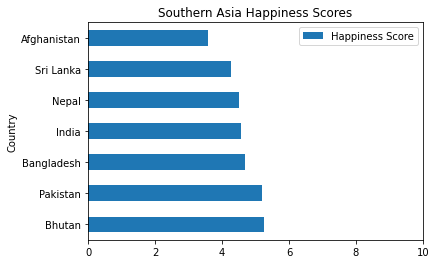

In [12]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

It's much easier to read this visualization - we can clearly see the labels and values. However, we wouldn't know if the Southern Asia region is representative of the entire world unless we look at the other regions. What we really want is to create a visualization that uses one number, a summary statistic like the mean, to summarize the data for each region.


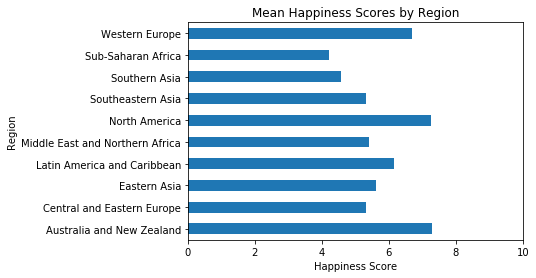

In this mission, we'll learn how to perform different kinds of aggregations, applying a statistical operation to groups of our data, and create visualizations like the one above.

Recall that in the Pandas Fundamentals course, we learned a way to use loops for aggregation. Our process looked like this:

- Identify each unique group in the data set.
- For each group:
 - Select only the rows corresponding to that group.
 - Calculate the average for those rows.

Let's use the same process to find the mean happiness score for each region.

**Instructions:**

- Create an empty dictionary named `mean_happiness` to store the results of this exercise.
- Use the `Series.unique()` method to create an array of unique values for the `Region` column.
- Use a for loop to iterate over the unique region values from the `Region` column.
 - Assign the rows belonging to the current region to a variable named `region_group`.
 - Use the `Series.mean()` method to calculate the mean happiness score for `region_group`.
 - Assign the mean value to the `mean_happiness` dictionary, using the region name as the key and the mean happiness score as the value.

##4. The GroupBy Operation

Let's break down the code we wrote in the previous screen into three steps:

1. *Split* the dataframe into groups.
2. *Apply* a function to each group.
3. *Combine* the results into one data structure.



```
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean
```



![img](https://s3.amazonaws.com/dq-content/343/split_apply_combine.svg)

As with many other common tasks, pandas has a built-in operation for this process. The `groupby` [operation](https://pandas.pydata.org/pandas-docs/stable/groupby.html) performs the "split-apply-combine" process on a dataframe, but condenses it into two steps:

1. Create a GroupBy object.
2. Call a function on the GroupBy object.

The GroupBy object, distinct from a dataframe or series object, allows us to split the dataframe into groups, but only in an abstract sense. Nothing is actually computed until a function is called on the GroupBy object.

You can think of the `groupby` operation like this. Imagine a dataframe as a structure made of stacking blocks in all different colors and sizes.

![img](https://s3.amazonaws.com/dq-content/343/Groupby_Dataframe.svg)

You know you'll eventually want to group the blocks according to color instead, but you don't know yet what you want to do with them after. Using the `groupby` process, we would first create a mapping document, the GroupBy object, containing information on how to group the blocks by color and where each block is located in the original structure.

![img](https://s3.amazonaws.com/dq-content/343/Groupby_Mapping.svg)

Once we create the mapping document, we can use it to easily rearrange the blocks into different structures. For example, let's say our manager asks us first to build another structure using the biggest block from each color.

![img](https://s3.amazonaws.com/dq-content/343/Groupby_Largest.svg)

Then, she asks us to build another structure using the block size the appears most frequently in each color.

![img](https://s3.amazonaws.com/dq-content/343/Groupby_Frequent.svg)

Creating the initial mapping document, or GroupBy object, allows us to optimize our work, because we no longer have to refer back to the original dataframe. By working with the `groupby` operation, we make our code faster, more flexible, and easier to read.

##5. Creating GroupBy Objects

The first step in the groupby operation is to create a GroupBy object:
![img](https://s3.amazonaws.com/dq-content/343/Groupby_Full.svg)
To create a GroupBy object, we use the `DataFrame.groupby()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html):


```
df.groupby('col')
```

where `col` is the column you want to use to group the data set. Note that you can also group the data set on multiple columns by passing a list into the `DataFrame.groupby()` method. However, for teaching purposes, we'll focus on grouping the data by just one column in this mission.

When choosing the column, think about which columns could be used to split the data set into groups. To put it another way, look at columns with the same value for multiple rows.

![img](https://s3.amazonaws.com/dq-content/343/Groups.svg)

We can see from the couple of rows above that the `Region` column fits this criteria. Let's confirm the number of regions and the number of unique values in each region for the entire dataframe with the `Series.value_counts()` method next:

In [13]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

Since there's a small number of groups and each group contains more than one unique value, we can confirm the Region column is a good candidate to group by.

Next, let's create a Groupby object and group the dataframe by the `Region` column:

In [14]:
happiness2015.groupby('Region')
print(happiness2015.groupby('Region'))

This isn't an error. This is telling us that an object of type GroupBy was returned, just like we expected.

Before we start aggregating data, we'll build some intuition around GroupBy objects. We'll start by using the `GroupBy.get_group()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) to select data for a certain group.

As an example, to select the data for just the `North America` group, we'd pass `'North America'` into the `get_group()` method as follows:

In [15]:
grouped = happiness2015.groupby('Region')
grouped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


**Instructions:**

- Use the `df.groupby()` method to group `happiness2015` by the `Region` column. Assign the result to `grouped`.
- Use the `GroupBy.get_group()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) to select the data for the `Australia and New Zealand` group only. Assign the result to `aus_nz`.

##6. Exploring GroupBy Objects

In the last exercise, we used the `GroupBy.get_group()` method to select the `Australia and New Zealand` group. The result is a dataframe containing just the rows for the countries in the `Australia and New Zealand` group.

We can also use the GroupBy.groups attribute to get more information about the GroupBy object:

In [16]:
grouped = happiness2015.groupby('Region')
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

The result is a dictionary in which each key corresponds to a region name. Notice that the values include the index for each row in the original `happiness2015` dataframe with the corresponding region name. To prove this, let's again look at the data for the Australia and New Zealand group:


```
'Australia and New Zealand': Int64Index([8, 9], dtype='int64')
```

Then, let's filter on indexes 8 and 9 in `happiness2015`:

In [17]:
happiness2015.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


And we see that those rows correspond to Australia and New Zealand! Notice that the `get_group()` method also returned the same dataframe above.

Next, let's continue building our intuition by practicing using the `groups` attribute and `get_group()` method.


**Instructions:**

For the following exercise, use the result from the dictionary returned by `grouped.groups` shown below:

`'North America': Int64Index([4, 14], dtype='int64'`

- Prove that the values for the 'North America' group in the dictionary returned by `grouped.groups` above correspond to countries in North America in the `happiness2015` dataframe.
 - Use the snippet above to identify the indexes of the countries in `happiness2015` that belong to the North America group.
 - Use the indexes to assign just the countries in North America in `happiness2015` to `north_america`.
- Use the `GroupBy.get_group()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) to select the data for the North America group only. Assign the result to `na_group`.
- Use the following code to compare `north_america` and `na_group`: `north_america == na_group`. Assign the result to `equal`.

##7. Common Aggregation Methods with Groupby

In the last exercise, we confirmed that the values for the 'North America' group returned by `grouped.groups` do correspond to the countries in `North_America` in the `happiness2015` dataframe.

Now that we have a good understanding of GroupBy objects, let's use them to aggregate our data. In order to aggregate our data, we must call a function on the GroupBy object.

![img](https://s3.amazonaws.com/dq-content/343/Groupby_Full.svg)

A basic example of aggregation is computing the number of rows for each of the groups. We can use the `GroupBy.size()` method to confirm the size of each region group:

In [18]:
grouped = happiness2015.groupby('Region')
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

Notice that the result is a Series and contains just one value for each group. Each value represents the number of rows in each group. For example, the 'Australia and New Zealand' group contains two rows.

Pandas has built in a number of other [common aggregation methods](https://pandas.pydata.org/pandas-docs/stable/groupby.html):


|Methods	| Description|
|---|---|
`mean()`	| Calculates the mean of groups.
`sum()`	| Calculates the sum of group values.
`size()`	| Calculates the size of the groups.
`count()`	| Calculates the count of values in groups.
`min()`	| Calculates the minimum of group values.
`max()`	| Calculates the maximum of group values.


Let's practice using one of these aggregation methods next.


**Instructions:**

- Apply the `GroupBy.mean()` [method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.GroupBy.mean.html) to `grouped`. Assign the result to `means`.

##8. Aggregating Specific Columns with Groupby

In the last exercise, we grouped `happiness2015` by region and calculated the mean of each region for each numeric column:



In [19]:
grouped = happiness2015.groupby('Region')
grouped.mean()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


You may have noticed that `Region` appears in a different row than the rest of the column names. Because we grouped the dataframe by region, the unique values in `Region` are used as the index. Up until now, we've mostly worked with dataframes with a numeric index.

![img](https://s3.amazonaws.com/dq-content/343/Index_Example.svg)

In some cases, we may only wish to aggregate one particular column in the original dataframe. GroupBy objects actually support column indexing, just like dataframes. You can select specific columns for a GroupBy object the same way you would for a dataframe:


|Select by Label |	Syntax|
---|---
Single column	| GroupBy["col1"]
List of columns	| GroupBy[["col1", "col2"]]

Let's practice aggregating just one column next.

**Instructions:**

- Select just the `Happiness Score` column from `grouped`. Assign the result to `happy_grouped`.
- Use the `GroupBy.mean()` method to compute the mean of `happy_grouped`. Assign the result to `happy_mean`.

##9. Introduction to the Agg() Method

We learned in the last exercise that we can use indexing to aggregate just one column at a time:

In [23]:
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()

In [24]:
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

However, what if we wanted to apply more than one kind of aggregation to a column at a time?

For example, suppose we wanted to calculate both the mean and maximum happiness score for each region. Using what we learned so far, we'd have to first calculate the mean, like we did above, and then calculate the maximum separately.

Luckily, however, the `GroupBy.agg()` [method](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) can perform both aggregations at once. We can use the following syntax:
![img](https://s3.amazonaws.com/dq-content/343/Agg_Syntax.svg)

Note that when we pass the functions into the `agg()` method as arguments, we don't use parentheses after the function names. For example, when we use `np.mean`, we refer to the function object itself and treat it like a variable, whereas `np.mean()` would be used to call the function and get the returned value.

The function names can also be passed in as strings, but we won't cover that explicitly in this mission. You can refer to [this documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html) for more information on this topic.

Let's practice using the `agg()` method next.



**Instructions:**

- Apply the `GroupBy.agg()` method to `happy_grouped`. Pass a list containing `np.mean` and `np.max` into the method. Assign the result to `happy_mean_max`.
 - As noted above, passing `'mean'` and `'max'` into the `GroupBy.agg()` method will also return the same results. However, for answer checking purposes, you'll have to use `np.mean` and `np.max`.
- We've also created a custom function named `dif` to calculate the difference between the mean and maximum values. Pass `dif` into the `GroupBy.agg()` method. Assign the result to `mean_max_dif`.

##10. Computing Multiple and Custom Aggregations with the Agg() Method

In the last exercise, we learned we can use the `GroupBy.agg()` method to:

1. Perform more than one aggregation at once.
2. Compute custom aggregations.

To compute multiple aggregations at once, we passed a list of the function names into the `agg` method:

In [25]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean_max = happy_grouped.agg([np.mean, np.max])

In [26]:
happy_mean_max

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


Our result is a dataframe containing both the mean and maximum happiness scores for each region. Note that the columns are named for the functions themselves. Because `np.max` is an alias for `np.amax`, the column for the maximum is named `amax`.

We also used a custom function to aggregate the data:

In [27]:
def dif(group):
    return(group.max() - group.mean())
happy_grouped.agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

Above, we calculated the difference between the mean and maximum values for each region. Because the `agg()` method allows us to create custom aggregation functions, it gives us much more flexibility in how we can transform our data.

Up until this point, we've deliberately split creating the GroupBy object and calling a function into separate steps to make it easier to understand. However, if you read through other teaching resources, you may see instances in which the statements are combined:

In [28]:
happiness2015.groupby('Region')['Happiness Score'].agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

Both approaches will return the same result. However, if you plan on computing multiple aggregations with the same GroupBy object, it's recommended to save the object to a variable first. You may wish to save it to a variable in all cases to make your code easier to understand. As we compute more complex aggregations, the syntax can get confusing!

##11. Aggregation with Pivot Tables

##12. Aggregating Multiple Columns and Functions with Pivot Tables